## **Cryptanalysis of Vigenre Cipher**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
def shift_chars(ct, shift):
    z = ""
    for i in range(len(ct)):
        if ct[i] in ['\n', '\t']:
            z += ct[i]
            continue
        z += chr(ord('a')+(ord(ct[i])+shift-ord('a'))%26)
    return z

def print_dict(d, sep):
    for k in d:
        print(k, end=sep)
        print(d[k], end="\n\n")

In [6]:
cipher_text = ""
cipher_length = 0

with open("./v_ciphertext_20.txt", 'r') as f:
    cipher_text = f.read()

cipher_length = len(cipher_text)

In [7]:
dists = []
bigrams = {}
for i in range(cipher_length-2):
    curr = cipher_text[i:i+2]
    if curr not in bigrams:
        bigrams[curr] = i
    else:
        dists.append(i-bigrams[curr])

dists.sort()

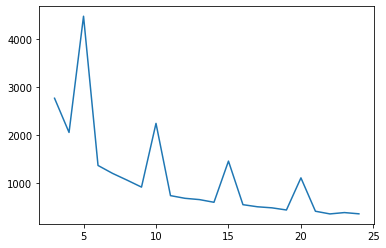

In [8]:
factors = []
freqs = []
for x in range(3, 25):
    ctr = 0
    for i in dists:
        if i%x==0:
            ctr+=1
    factors.append(x)
    freqs.append(ctr)

plt.plot(factors, freqs)
plt.show()

From the plot we see that distances of the bigrams are mostly factor of 5 which means key length is 5

In [9]:
key_length = 5

l = []

for start in range(key_length):
    curr = ''
    for i in range(start, cipher_length, key_length):
        curr += cipher_text[i]
    l.append(curr)

l

['wxqiizkqebkliluiaqwldbevpxlqvwvlqlbispmievqvnwvlmjmmvwgqebvkiaiuqpiwaoxzumboqcwiemucmpwbtalwmzwmwlimmmlibtttmqsozlioeixktwijbvmuzmqglqqqlaumsitjuamzwwqzzopulamvujwijdmwpjwpsawwumvilimmwqmopitiblgivppcqbqbvamlizzkppmwmmvqabifuctmimabtbmxwzmoxiuontijebmclqbsapgmiivcmvubcvltiqeijqmwbctzmwijimvlinwjvaitbcbqozcmxblzmmtiklmkbplbpmbvsmcpmqqaeittakxlqiiijvpbbblmbkwimptbwqjqmemmznpwzmmikpzulivbacewpwmbxtwtpipvbmnwknmwxkebbivjmclqiuztpqjpaqiqimbcqaavpmbiqbzgzwlcgpwnkbbnmqqepbqsmwqcqpdulvmlewqtvmpuuzxapzppntpvquvlijmmkectmbamwumajwfiijwtlubmgaqmimwsxabqbqmblzmiwtagamzqzzmvqqawmpblmbxspvpiqalpalcibpzmuigpmxcbozlzmejvzzlkmlblibumblizizblbcigupbbuqqqoqiwitjlwxwzcwuoieqkwpsvbieaepbwjmmvaimvbdwpavezecsqytkmslpjmnmbplvctpkbbmeigzxbliaplmsaelqbgvabpbjvlpmjimvptiqmzmwmwziawjmmtclbuimiqzmqspsvmmtlwwmiuckqbtksaepeixbpvlzpijpumtvuimuzqtgaoptmmbmkietjpapmalbbomjjlipjwwwizlmqtuvbpjwimmmobemwbjlaevtqqtipwpwlqcvmuvwtzpmpmwmbwmpcmazvvzmzmawsbbncbctppbgpvwpwpbbwzbezotmtctvguotappgbonibxqdimwlbjuibjmllwvmiemvppv

In [10]:
char_freqs = []

def get_freqs(cipher_text):
    N = len(cipher_text)
    freq = {}
    skip = 0
    for i in range(len(cipher_text)):
        if skip:
            skip=0
            continue
        if cipher_text[i]=='\\':
            if cipher_text[i+1]=='n' or cipher_text[i+1]=='t':
                skip=1
                continue
        c = cipher_text[i]
        if c not in freq:
            freq[c]=0
        freq[c]+=1
    for i in freq:
        freq[i]=round(freq[i] / N*100, 2)

    return freq

for currstr in l:
    currfreq = get_freqs(currstr)
    xx = [[currfreq[k], k] for k in currfreq]
    xx.sort(reverse=True)
    char_freqs.append(pd.DataFrame(xx))

In [11]:
char_freqs

[        0  1
 0   13.05  m
 1    9.26  b
 2    8.81  i
 3    7.75  p
 4    6.47  w
 5    6.36  v
 6    5.97  q
 7    5.91  l
 8    5.02  z
 9    4.85  a
 10   4.18  t
 11   3.12  j
 12   2.84  u
 13   2.79  e
 14   2.51  c
 15   2.06  k
 16   1.78  x
 17   1.73  o
 18   1.56  n
 19   1.45  g
 20   1.28  s
 21   0.78  d
 22   0.22  f
 23   0.17  r
 24   0.06  y,
         0  1
 0   12.83  w
 1    9.76  l
 2    9.20  s
 3    7.19  g
 4    6.75  z
 5    6.41  j
 6    5.47  v
 7    5.13  f
 8    5.13  a
 9    5.02  k
 10   4.02  d
 11   3.12  t
 12   2.51  m
 13   2.45  u
 14   2.40  e
 15   2.29  o
 16   2.23  y
 17   2.23  x
 18   1.90  q
 19   1.45  c
 20   1.12  h
 21   1.06  n
 22   0.17  b
 23   0.11  p
 24   0.06  i,
         0  1
 0   13.27  y
 1    9.37  u
 2    8.20  b
 3    8.09  i
 4    7.70  n
 5    5.86  h
 6    5.74  m
 7    5.69  l
 8    5.30  c
 9    4.96  f
 10   4.57  x
 11   2.84  w
 12   2.57  z
 13   2.57  v
 14   2.57  o
 15   2.18  q
 16   1.84  a
 17   1.39  s
 18 

In [16]:
new_l = []
shifts = [18, 8, 6, 19, 0]      # obtained by observing the shifts of maxFreq letter from 'e'
for i in range(key_length):
    new_l.append(shift_chars(l[i], shifts[i]))

In [21]:
plain_text = ''
for i in range(cipher_length):
    plain_text += new_l[i%key_length][i//key_length]

with open('./v_plaintext_20.txt', 'w') as f:
    f.write(plain_text)

plain_text

'onceuponatimeinadistantpersiancitylivedtwobrotherscalledalibabaandkasimalibabawasterriblypoorandhelivedwithhiswifeinamudhuthepickedupsticksinthewoodsandsoldtheminbundlesatthemarketkasimhoweverhadarichwifeandhelivedinabigfinehouseandsoldcarpetshebecamericherthaneveronedayasalibabawasgatheringsticksinawoodsomewayfromthecityheheardabandofhorsemengalloptowardshimscaredthathemightbeintroubleforstealingwoodhescrambledupatreeandhidamongstthefoliagesecondsbeforethemenarmedtotheteethrodeunderneaththeywererobbersnodoubtaboutthatalicouldtellbytheirevillooksroughbeardsandbadlanguagebutwhatmadeitperfectlycleartohimwasthebootytheyunloadedfromtheirhorsesobviouslyplunderedinaraidtheirleaderwasagrimwickedlookingmanfollowedbyhismenhestrodetowardsarockymountainnearbythrowingwidehisarmssuddenlyshoutedopensesamealibabacouldhardlybelievehiseyesforattherobberswordstherockfaceswungopentobecometheentrancetoadeepdarkcavetherobberstroopedinsidedraggingtheirsacksalibabawasstruckdumbbythisamazingsightandhecrouche

In [54]:
key = ''

for i in [chr(ord('a')+(-i)%26) for i in shifts]:
    key+=i

key

'isuha'

In [56]:
def encode(msg, key):
    C = ''
    for i in range(len(msg)):
        a = ord('a')
        ix = ord(msg[i]) + ord(key[i % len(key)]) - a
        if ix>ord('z'):
            ix-=26
        C += chr(ix)
        # print(msg[i], key[i % len(key)], C[-1])
    return C


encode(plain_text, key)

'wfwluxghhtqeypnivcztifnwezkchnkanflqnyktegvyobzyysksfselsfpbituhnlcuziusfpbitudaalyyrqtffpwglhnlzysidwxdibzbpseazlivsgbdpmnoexawrelmjztquezivlblwwgxzavvmvlllblmqfvbnldyzablblmijeltssmpmpgqlvmjbhdijcjheazlavvbllqnykivsvpgnahlhwmmlavvmvlluuypmlmoejwwhmmjcjhmjnoavwplrwfykagsmhlqtuiaesmnabzyyivymaikcmpnioivdagglwiqzyoulblcqlsoepwuydituudwxbvrawglnosfsoxlidazvmoiukwhrmvnoabzytioznieqfnyoctflfwjmaeidcugegikhmkwyautfldchuarmwuudpaxhmwfaztbzymotauneawwvnlkvlfwjyahmeyuazeyktwlbltmwnorwvybnlwlueilbahmqqlrmjiibmjmuolgoititibtbzuaatawvutvnllttsahmallvqdfvosklvuozvlazvmhnltuklifabaowvbtezuamivyptxwlmeklffctwuytwzctwiknoejgiaybzyfuvdihdmvzyoulblizziysmkiivqgozlghfbnlwlldqfuyaqvnoeqjflalwldaasayiuocjkmvfvosahnmifzvltgqldjqbpsuwhoeallvdmlidazvmhrwuefmwmhaaqfhlaztsahzgqpnoockepamhrukmbdlwhsyazibtmviwevkyzauwusijsvhcwmfkhijxsyjwfpedwbpsmqyzfwjuatpwlvbjwlzwwjxztpwlvcsxujeaoougwhyutwtyjouwnoemfnyavuyaoivylplslrcinyahmjiibmjmarwgjldqfmpdmvlhgoahntpwcysiuezatavhbiouzsbjojklmgibglbpsieugivympgpluudpwwyocubl